# XGBoost


## Omajinai

In [1]:
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 6)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "jupyterlab"

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import xgboost

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning:

0.23ubuntu1 is an invalid version and will not be supported in a future release

/home/eunchong/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning:

0.1.36ubuntu1 is an invalid version and will not be supported in a future release



In [3]:
print('pandas', pd.__version__)
print('xgboost', xgboost.__version__)

pandas 1.3.5
xgboost 1.5.1


## Data

In [4]:
!wget https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv -O newly_confirmed_cases_daily.csv

--2022-01-09 11:41:01--  https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
Resolving covid19.mhlw.go.jp (covid19.mhlw.go.jp)... 13.33.210.11, 13.33.210.126, 13.33.210.110, ...
Connecting to covid19.mhlw.go.jp (covid19.mhlw.go.jp)|13.33.210.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95963 (94K) [application/octet-stream]
Saving to: ‘newly_confirmed_cases_daily.csv’

newly_confirmed_cas 100%[===================>]  93.71K  --.-KB/s    in 0.02s   

2022-01-09 11:41:02 (5.21 MB/s) - ‘newly_confirmed_cases_daily.csv’ saved [95963/95963]



In [5]:
df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)
df.index = pd.to_datetime(df.index)
print(df.shape)
display(df.head(1))
display(df.tail(5))

(723, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,673,10,3,3,2,0,1,1,2,12,...,0,0,10,6,1,1,1,1,5,130
2022-01-04,1151,26,6,1,6,0,0,2,10,33,...,3,4,19,0,6,1,1,0,5,225
2022-01-05,2491,34,6,4,6,0,14,13,16,30,...,6,5,46,15,16,4,2,3,19,623
2022-01-06,4301,74,1,6,12,2,2,8,34,51,...,6,5,80,19,10,24,8,6,61,981
2022-01-07,6074,94,9,8,7,0,3,18,58,52,...,24,4,135,36,29,31,16,9,110,1414


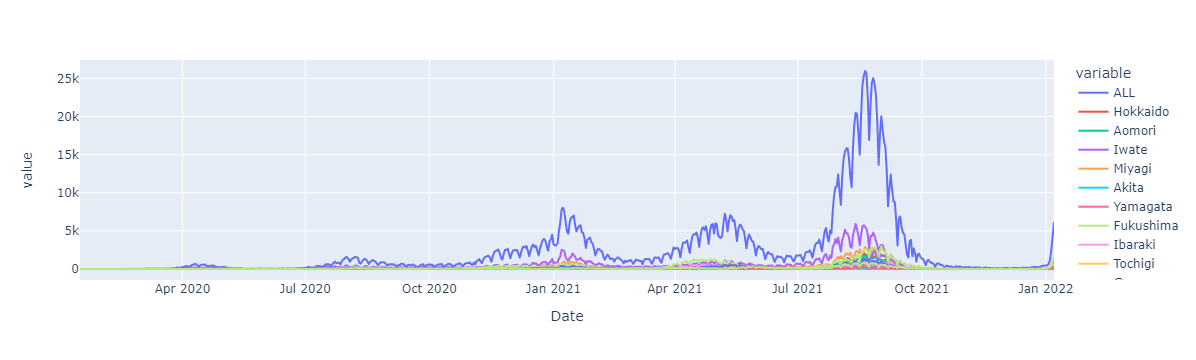

In [6]:
px.line(df, )

In [7]:
df_gr = df.groupby(pd.Grouper(level='Date', freq='W')).mean()
df_gr = df_gr.drop(df_gr.index[-1])
print(df_gr.shape)
display(df_gr.head(1))
display(df_gr.tail(5))

(103, 48)


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-19,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-05,112.000000,5.428571,0.000000,0.000000,0.285714,1.142857,6.142857,0.142857,0.000000,1.714286,...,0.0,0.000000,5.428571,0.000000,0.000000,0.142857,0.142857,0.285714,0.000000,3.000000
2021-12-12,114.857143,3.428571,0.428571,0.000000,0.428571,0.142857,1.000000,1.000000,2.000000,1.571429,...,0.0,0.000000,3.857143,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,3.428571
2021-12-19,148.285714,8.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,1.142857,1.571429,...,0.0,0.000000,2.571429,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.571429
2021-12-26,221.000000,18.857143,0.000000,0.000000,0.285714,0.000000,0.142857,2.714286,1.571429,5.285714,...,0.0,0.000000,11.285714,0.428571,0.714286,0.000000,0.000000,0.000000,1.571429,17.857143
2022-01-02,384.000000,21.285714,0.285714,0.714286,0.428571,0.000000,0.142857,2.428571,1.571429,12.142857,...,0.0,0.142857,6.857143,0.857143,0.428571,0.000000,0.000000,0.000000,0.428571,36.857143


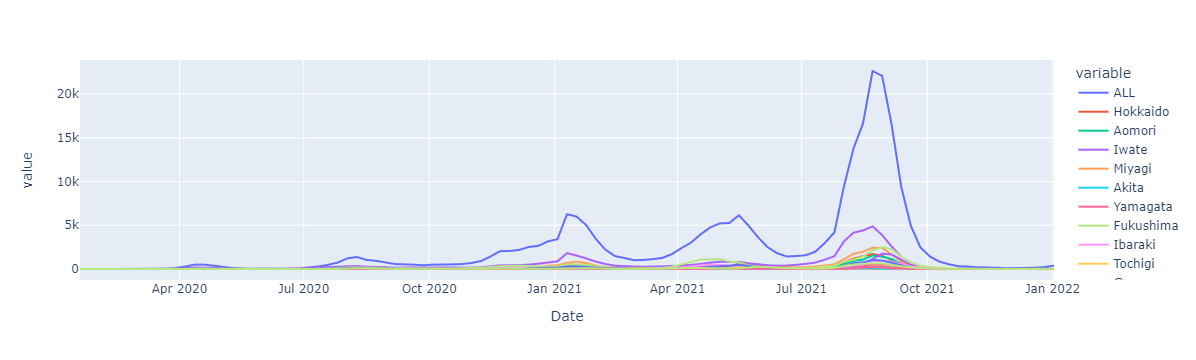

In [8]:
px.line(df_gr,)

### Scale

In [9]:
sc = MinMaxScaler(feature_range=(0,1))
ts_all = df_gr.ALL
ts_all_sc = sc.fit_transform(ts_all.values.reshape(-1, 1)).ravel()
ts_all_sc = pd.Series(ts_all_sc, index=ts_all.index)
ts_all_sc.head(1)

Date
2020-01-19    0.0
Freq: W-SUN, dtype: float64

### FE

In [10]:
forecast_weeks = 12
# df_fe = df_gr.ALL.to_frame()
df_fe = ts_all_sc.to_frame(name='ALL')

# add new rows for forecast
index_list = pd.date_range(ts_all_sc.index[-1]+relativedelta(weeks=1), ts_all_sc.index[-1]+relativedelta(weeks=forecast_weeks), freq='W')
df_fe = pd.concat([df_fe, pd.DataFrame(index=index_list)])

# shift
for i in range(forecast_weeks, forecast_weeks+12):
    df_fe[f'ALL_{i}_week_ago'] = df_fe.ALL.shift(i)
# df_fe[f'ALL_12_week_ago'] = df_fe.ALL.shift(12)
df_fe['year'] = df_fe.index.year
df_fe['month'] = df_fe.index.month
df_fe['weekofyear'] = df_fe.index.isocalendar().week
df_fe = df_fe.astype('float')
df_fe = df_fe.loc[df_fe.ALL_23_week_ago.dropna().index, :]
df_fe

,ALL,ALL_12_week_ago,ALL_13_week_ago,ALL_14_week_ago,ALL_15_week_ago,ALL_16_week_ago,ALL_17_week_ago,ALL_18_week_ago,ALL_19_week_ago,ALL_20_week_ago,ALL_21_week_ago,ALL_22_week_ago,ALL_23_week_ago,year,month,weekofyear
2020-06-28,0.003517,0.012037,0.004931,0.001699,0.002002,0.001478,0.000696,0.000475,0.000084,0.000008,0.000039,0.000008,0.000000,2020.0,6.0,26.0
2020-07-05,0.008023,0.021946,0.012037,0.004931,0.001699,0.002002,0.001478,0.000696,0.000475,0.000084,0.000008,0.000039,0.000008,2020.0,7.0,27.0
2020-07-12,0.013331,0.021883,0.021946,0.012037,0.004931,0.001699,0.002002,0.001478,0.000696,0.000475,0.000084,0.000008,0.000039,2020.0,7.0,28.0
2020-07-19,0.021271,0.016771,0.021883,0.021946,0.012037,0.004931,0.001699,0.002002,0.001478,0.000696,0.000475,0.000084,0.000008,2020.0,7.0,29.0
2020-07-26,0.032663,0.010371,0.016771,0.021883,0.021946,0.012037,0.004931,0.001699,0.002002,0.001478,0.000696,0.000475,0.000084,2020.0,7.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-27,NaN,0.004937,0.003965,0.005991,0.007916,0.008471,0.012265,0.013969,0.023846,0.037100,0.063273,0.109580,0.219031,2022.0,2.0,8.0
2022-03-06,NaN,0.005063,0.004937,0.003965,0.005991,0.007916,0.008471,0.012265,0.013969,0.023846,0.037100,0.063273,0.109580,2022.0,3.0,9.0
2022-03-13,NaN,0.006540,0.005063,0.004937,0.003965,0.005991,0.007916,0.008471,0.012265,0.013969,0.023846,0.037100,0.063273,2022.0,3.0,10.0
2022-03-20,NaN,0.009753,0.006540,0.005063,0.004937,0.003965,0.005991,0.007916,0.008471,0.012265,0.013969,0.023846,0.037100,2022.0,3.0,11.0


### split

In [11]:
X = df_fe.drop('ALL', axis=1)
y = df_fe.ALL
print(X.shape, y.shape)

(92, 15) (92,)


## functions

In [12]:
def trainXGBoost(X_train, y_train):    
    # val
    X_val = X_train[X_train.index == X_train.index[-1]]
    X_train = X_train.drop(X_train.index[-1])
    y_val = y_train[y_train.index == y_train.index[-1]]
    y_train = y_train.drop(y_train.index[-1])
    
    params = {'n_estimators': 1000, 'random_state': 42, 'objective': 'reg:squarederror', 'booster': 'gblinear'}
    
    model = xgboost.XGBRegressor(**params)
    model.fit(
        X_train, y_train, verbose=0,
        eval_set=[(X_val, y_val)], eval_metric='rmse', early_stopping_rounds=10,
    )

    return model

## forecast

(80, 15) (80,)
CPU times: user 424 ms, sys: 12 ms, total: 436 ms
Wall time: 80.2 ms


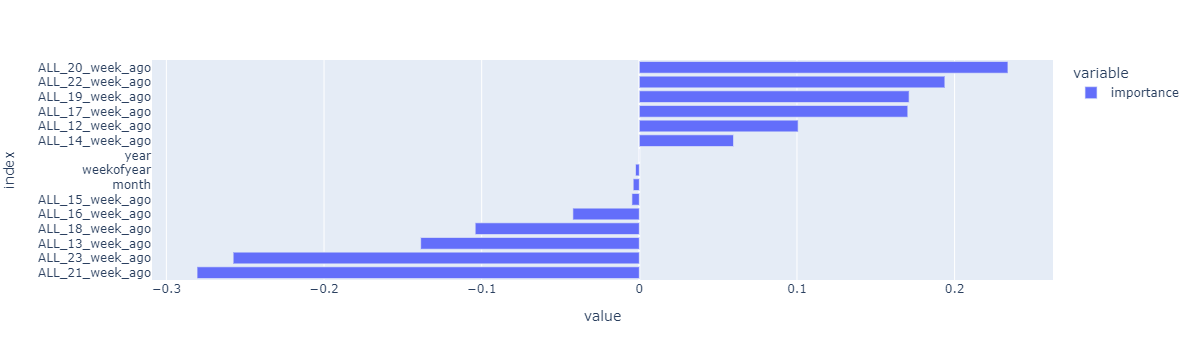

In [13]:
%%time

train_last_date = '2022-01-02'
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
print(X_train.shape, y_train.shape)

model = trainXGBoost(X_train, y_train)

fi = pd.DataFrame(model.coef_, index=X_train.columns, columns=['importance']).sort_values('importance')
px.bar(fi, orientation='h')

RMSE: 4475.4


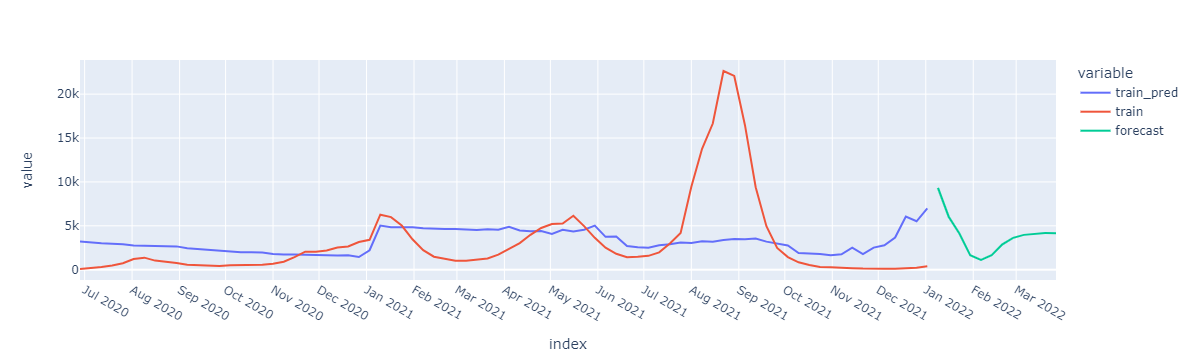

In [15]:
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
X_train = X[X.index <= train_last_date]
y_train = y[y.index <= train_last_date]
y_train_index = y_train.index

y_train_pred = model.predict(X_train)
y_train_pred = sc.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_train_pred = pd.Series(y_train_pred, index=y_train_index, name='train_pred')
y_train = sc.inverse_transform(y_train.values.reshape(-1, 1)).ravel()
y_train = pd.Series(y_train, index=y_train_index, name='train')

rmse = np.sqrt( mean_squared_error(y_train, y_pred) )
print('RMSE: {:.5}'.format(rmse))

X_forecast = X[X.index > train_last_date]
y_forecast = y[y.index > train_last_date]
y_forecast_index = y_forecast.index

y_forecast = model.predict(X_forecast)
y_forecast = sc.inverse_transform(y_forecast.reshape(-1, 1)).ravel()
y_forecast = pd.Series(y_forecast, index=y_forecast_index, name='forecast')

fig = px.line(pd.concat([y_pred, y_train, y_forecast], axis=1))
fig.update_layout({
    'xaxis': {
        'dtick': 'M1'
    }
})
fig.show()